In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
data = pd.read_csv('./data/1.2/behavior.csv', sep = ',',encoding = 'utf-8')

In [2]:
data.head()

,用户,商品,品类,地理位置,date,hour,浏览,收藏,加购物车,购买
0,10001082,285259775,4076,97lk14c,2014-12-08,18,1,0,0,0
1,10001082,4368907,5503,NaN,2014-12-12,12,1,0,0,0
2,10001082,53616768,9762,NaN,2014-12-02,15,1,0,0,0
3,10001082,151466952,5232,NaN,2014-12-12,11,1,0,0,0
4,10001082,53616768,9762,NaN,2014-12-02,15,0,0,0,1


In [3]:
#计算PV数
PV = data.浏览.sum()

In [4]:
#计算收藏或加购物车数
data1 = data[['用户','商品','收藏','加购物车']]
data1.eval('收藏或加购物车 = 收藏 + 加购物车', inplace=True)
data1.loc[data1['收藏或加购物车'] == 2, '收藏或加购物车'] = 1  #将同时收藏和加购物车的值改为1
data2 = data1[['用户','商品','收藏或加购物车']]
data2.drop_duplicates(inplace=True)
收藏或加购物车 = data2.收藏或加购物车.sum()

C:\Users\lb\AppData\Local\Temp\ipykernel_408\1272086602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop_duplicates(inplace=True)


In [5]:
#计算购买数
data1 = data[['用户','商品','购买']]
data2 = data1.drop_duplicates()
购买 = data2.购买.sum()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
plt.rcParams['font.sans-serif'] = 'SimHei'

N = 3
width = 0.55
x1 = np.array([PV, 收藏或加购物车, 购买])  #产生array([14153441,   938497,   199819], dtype=int64)
x1

array([14153441,   938497,   199819], dtype=int64)

In [7]:
x2 = np.array((x1.max()-x1)/2) # 占位：array([      0., 6607472., 6976811.])
x2

array([      0., 6607472., 6976811.])

In [8]:
#x1+x2
x3 = []
for i,j in zip(x1,x2):
    x3.append(i+j)
    print(x3)
x3 = np.array(x3)
x3

[14153441.0]
[14153441.0, 7545969.0]
[14153441.0, 7545969.0, 7176630.0]


array([14153441.,  7545969.,  7176630.])

[(7076720.5, 1), (7076720.5, 0)]


C:\Users\lb\AppData\Local\Temp\ipykernel_408\253543684.py:22: MatplotlibDeprecationWarning: 
The 'minimumdescent' parameter of __init__() was deprecated in Matplotlib 3.4 and will be removed two minor releases later. If any parameter follows 'minimumdescent', they should be passed as keyword, not positionally.
  offsetbox = TextArea(a, minimumdescent=False)


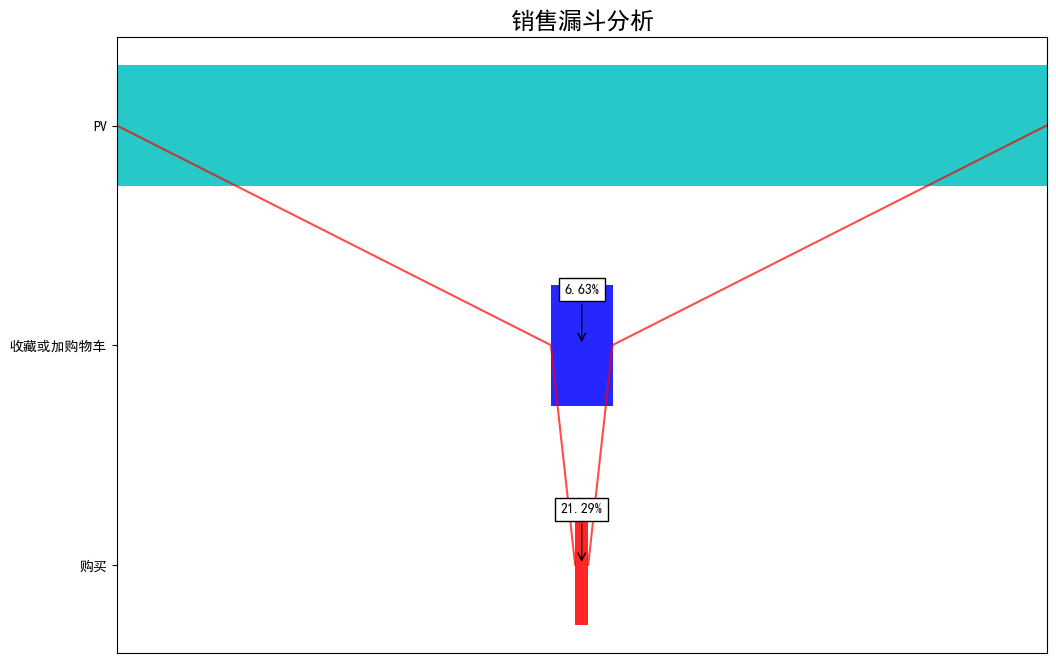

In [9]:
y = -np.sort(-np.arange(N)) # 产生array([2, 1, 0])
labels=['PV','收藏或加购物车','购买']

#figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

#plot
ax.barh(y,x3,width,tick_label=labels,color= ['c','b','r'],alpha=0.85)  #横条形图
ax.plot(x3,y,'r',alpha=0.7) #右部折线
ax.barh(y,x2,width,color='w',alpha =1) #辅助图,用于遮挡，必须为白色
ax.plot(x2,y,'r',alpha=0.7) #左部折现

#setting #添加转化率值
transform = []       
for i in range(0,len(x1)):
    if i < len(x1)-1:
        transform.append('%.2f%%'%((x1[i+1]/x1[i])*100))
l = [(x1.max()/2, 1),(x1.max()/2, 0)]
print(l)
for a,b in zip(transform,l):
    offsetbox = TextArea(a, minimumdescent=False)
    ab = AnnotationBbox(offsetbox, b,
                        xybox=(0, 40),
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
ax.set_xticks([])
ax.set_yticks(y)
ax.set_xlim(0,PV+5000)  #设置x轴的长度，便于美观
plt.title('销售漏斗分析',fontsize='xx-large',fontweight='bold')
plt.show()